# Scikit-learn
- https://scikit-learn.org/stable/
- Scikit-learn은 파이썬에서 머신러닝 분석을 위해 가장 널리 사용되는 오픈 소스 라이브러리
- 파이썬을 이용한 머신러닝 프로젝트를 빠르게 시작하고 개발할 수 있도록 돕는 강력한 도구
- 다양한 머신러닝 관련한 기술들을 통일되고 쉬운 인터페이스로 사용할수 있게 해주는 라이브러리
- 머신러닝 관련 알고리즘과 개발을 위한 기능 제공
- 설치하기
    ```python
    pip install scikit-learn
    ```
- 일반적인 사이킷런 api import 방법
    ```python
    from sklearn.<모듈명> import <함수명 or 클래스명>
    ```


## Scikit-learn의 주요 특징
- 다양한 알고리즘
    - 분류, 회귀, 클러스터링, 차원 축소 등 머신러닝의 주요 알고리즘을 모두 포함
- 통일된 인터페이스
    - 모든 알고리즘이 동일한 방식으로 사용될 수 있도록 설계되어 있어 학습, 예측, 평가 과정이 매우 직관적
- 효율성
    - NumPy, SciPy와 같은 선형 대수 라이브러리와 최적화된 알고리즘을 기반으로 하여 빠르고 효율적인 성능을 제공
- 확장성
    - 다른 파이썬 데이터 과학 라이브러리와 쉽게 통합
- 활발한 커뮤니티
    - 많은 개발자들이 참여하고 있으며, 지속적으로 새로운 기능이 추가

## Scikit-learn 주요 모듈
- sklearn.datasets
    - 예제 데이터 세트
- sklearn.metrics
    - 성능평가
- sklearn.preprocessing
    - 데이터 전처리(범주형 인코딩, 스케일링 등)
- sklearn.feature_selection
    - 특성 선택
- sklearn.model_selection
    - 데이터 분리, 하이퍼 파라미터 튜닝
- sklearn.ensemble
    - 앙상블 알고리즘
- sklearn.cluster
    - 군집분석 관련 알고리즘
- sklearn.decomposition
    - 차원축소 관련 알고리즘



## Scikit-learn 모델
- 주어진 문제를 해결하기 위한 다양한 모델들이 있음
- Scikit-learn의 지도학습 관련 모델의 대부분은 회귀와 분류 문제에 모두 사용 가능함
- `Classifier`: 분류 알고리즘을 구현한 모델 클래스
    - ex) `DecisionTreeClassifier`
- `Regressor`: 회귀 알고리즘을 구현한 모델 클래스
    - ex) `DecisionTreeRegressor`



## Scikit-learn 사용 방법
- 머신러닝 단계별 적절한 모듈을 선택하여 클래스, 함수를 Import 하여 사용
- scikit-learn은 클래스 사용법을 통일된 방식으로 제공
- 모델 학습을 위한 메서드
    - `fit`: 모델 학습
    - `predict`: 모델 예측
    - `predict_proba`: 모델이 예측한 확률
- 데이터 변환을 위한 메서드
    - `fit`: 데이터를 변환하기 위한 사전작업
    - `transform`: 데이터를 변환
    - `fit_transform`: fit 과 transform 한번에 수행

# 타이타닉 평가 세트
- https://drive.google.com/file/d/15HMT-nXKFt458FRpjqky5Z9o3CjqQOXR/view?usp=sharing


In [1389]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
DATA_PATH = "data/"

In [2]:
import numpy as np
import pandas as pd

In [4]:
train = pd.read_csv(f"{DATA_PATH}titanic_train.csv") # 학습데이터
test = pd.read_csv(f"{DATA_PATH}titanic_test.csv") # 테스트데이터

train.shape, test.shape

((916, 12), (393, 11))

# 데이터 분석(Data analysis)

In [1393]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   name         916 non-null    object 
 4   gender       916 non-null    object 
 5   age          736 non-null    float64
 6   sibsp        916 non-null    int64  
 7   parch        916 non-null    int64  
 8   ticket       916 non-null    object 
 9   fare         916 non-null    float64
 10  cabin        210 non-null    object 
 11  embarked     916 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.0+ KB


## 타겟값의 비율 확인

In [1394]:
train["survived"].mean()

0.3777292576419214

## 수치형 변수 분석

In [1395]:
train.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,916.000000,916.000000,916.000000,736.000000,916.000000,916.000000,916.000000
mean,657.570961,0.377729,2.284934,29.904891,0.494541,0.375546,34.428848
std,377.391314,0.485084,0.840656,14.255770,1.040687,0.877660,54.607103
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,336.500000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,659.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,982.250000,1.000000,3.000000,38.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [1396]:
train.skew(numeric_only=True)

,0
passengerid,0.008021
survived,0.505225
pclass,-0.576934
age,0.452870
sibsp,4.028972
parch,4.062338
fare,4.516881


In [1397]:
train.corr(numeric_only=True) # 상관계수가 높은 컬럼끼리 묶어서 그래프 생성해보기

,passengerid,survived,pclass,age,sibsp,parch,fare
passengerid,1.000000,0.021280,-0.068704,0.020408,-0.032515,0.035393,0.065707
survived,0.021280,1.000000,-0.285660,-0.032927,0.004089,0.095138,0.237830
pclass,-0.068704,-0.285660,1.000000,-0.394001,0.073610,0.039968,-0.547945
age,0.020408,-0.032927,-0.394001,1.000000,-0.227772,-0.163459,0.182191
sibsp,-0.032515,0.004089,0.073610,-0.227772,1.000000,0.343265,0.119521
parch,0.035393,0.095138,0.039968,-0.163459,0.343265,1.000000,0.165641
fare,0.065707,0.237830,-0.547945,0.182191,0.119521,0.165641,1.000000


## 범주형 변수 분석

In [1398]:
train.nunique()

,0
passengerid,916
survived,2
pclass,3
name,914
gender,2
age,87
sibsp,7
parch,8
ticket,692
fare,246


In [1399]:
# 호칭 컬럼 생성
train['title'] = train['name'].str.extract(' ([A-Za-z]+)\.')
train['title'] = train['title'].apply(lambda x: x if x in ['Mr', 'Miss', 'Mrs', 'Master'] else 'UNK')
train

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Mr
1,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S,Mr
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.0250,NaN,S,Mr
3,1130,1,2,"Hiltunen, Miss. Marta",female,18.0,1,1,250650,13.0000,NaN,S,Miss
4,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr
912,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q,Mr
913,664,0,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S,Mr
914,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S,Mr


In [1440]:
test['name'].str.extract(' ([A-Za-z]+)\.').value_counts()

,count
0,
Mr,233
Miss,80
Mrs,49
Master,23
Dr,3
Rev,2
Capt,1
Ms,1
Sir,1


In [1400]:
test['title'] = test['name'].str.extract(' ([A-Za-z]+)\.')
test['title'] = test['title'].apply(lambda x: x if x in ['Mr', 'Miss', 'Mrs', 'Master'] else 'UNK')
test

,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,253,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,Mr
1,84,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S,Mr
2,771,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,NaN,S,Mr
3,1052,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,Miss
4,1005,3,"Buckley, Miss. Katherine",female,18.5,0,0,329944,7.2833,NaN,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...
388,567,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S,Mr
389,831,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,Mrs
390,116,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S,Mr
391,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,Mr


In [1401]:
train["cabin"]

,cabin
0,NaN
1,NaN
2,NaN
3,NaN
4,E12
...,...
911,B101
912,NaN
913,NaN
914,NaN


In [1402]:
tmp = train.groupby("cabin")["fare"].mean().reset_index().rename(columns={"fare":"cabin_enc"})
tmp

,cabin,cabin_enc
0,A10,40.12500
1,A11,27.72080
2,A16,39.60000
3,A18,29.70000
4,A23,30.00000
...,...,...
140,F2,26.00000
141,F33,10.50000
142,F4,39.00000
143,G6,13.58125


In [1403]:
train = pd.merge(train, tmp, on="cabin", how="left")
train

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,title,cabin_enc
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Mr,NaN
1,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S,Mr,NaN
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.0250,NaN,S,Mr,NaN
3,1130,1,2,"Hiltunen, Miss. Marta",female,18.0,1,1,250650,13.0000,NaN,S,Miss,NaN
4,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,Mr,26.5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,512.3292
912,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q,Mr,NaN
913,664,0,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S,Mr,NaN
914,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S,Mr,NaN


- data leakage(데이터 유출)
    - 모델 학습 및 평가에 사용할 수 없는 정보를 사용한 경우

In [1404]:
# tmp = test.groupby("cabin")["fare"].mean().reset_index().rename(columns={"fare":"cabin_enc"}) # X
test = pd.merge(test, tmp, on="cabin", how="left")
test

,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,title,cabin_enc
0,253,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,Mr,NaN
1,84,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S,Mr,NaN
2,771,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,NaN,S,Mr,NaN
3,1052,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,Miss,NaN
4,1005,3,"Buckley, Miss. Katherine",female,18.5,0,0,329944,7.2833,NaN,Q,Miss,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,567,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S,Mr,NaN
389,831,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,Mrs,NaN
390,116,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S,Mr,NaN
391,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,Mr,NaN


# 특성 공학(Feature Engineering)
- 학습데이터에 대해 Feature Engineering 과정에서 수행했던 작업을 평가데이터에  동일한 방식으로 수행할 것
    - 평가를 위해 예측을 수행해야하기 때문


## Feature Extraction
- 특성으로 사용할 변수 추출하기

In [1405]:
cols = ["pclass", "gender", "age", "sibsp", "parch", "fare", "embarked", "title"]
train_ft = train[cols].copy()
test_ft = test[cols].copy()

In [1406]:
train_ft.shape, test_ft.shape

((916, 8), (393, 8))

In [1407]:
# train_ft["가족수"] = train_ft["sibsp"] + train_ft["parch"]
# test_ft["가족수"] = test_ft["sibsp"] + test_ft["parch"]
train_ft['has_family'] = (train_ft["sibsp"] + train_ft["parch"]).apply(lambda x: 1 if x > 0 else 0)
test_ft['has_family'] = (test_ft["sibsp"] + test_ft["parch"]).apply(lambda x: 1 if x > 0 else 0)

## Data Cleaning
- 결측치 및 이상치 처리와 같은 데이터 정제

In [1408]:
train_ft.isnull().sum()

,0
pclass,0
gender,0
age,180
sibsp,0
parch,0
fare,0
embarked,0
title,0
has_family,0


In [1409]:
test_ft.isnull().sum()

,0
pclass,0
gender,0
age,83
sibsp,0
parch,0
fare,1
embarked,2
title,0
has_family,0


In [1410]:
train.groupby(['pclass', 'gender'])['age'].mean()

pclass  gender
1       female    36.910891
        male      40.677570
2       female    27.609589
        male      29.356903
3       female    22.503853
        male      26.368026
Name: age, dtype: float64

- 학습데이터 결측치 처리

In [1411]:
# age_mean = train_ft["age"].mean()
age_mean = train.groupby(['pclass', 'gender'])['age'].mean()
for (pclass, gender), mean_age in age_mean.items():
    train_ft.loc[(train_ft['pclass'] == pclass) & (train_ft['gender'] == gender) & (train_ft['age'].isnull()), 'age'] = mean_age
fare_median = train_ft["fare"].median()
embarked_mode = train_ft["embarked"].mode()[0]

In [1412]:
# train_ft["age"] = train_ft["age"].fillna(age_mean)

- 테스트 데이터 결측치 처리

In [1413]:
# test_ft["age"] = test_ft["age"].fillna(age_mean)
for (pclass, gender), mean_age in age_mean.items():
    test_ft.loc[(test_ft['pclass'] == pclass) & (test_ft['gender'] == gender) & (test_ft['age'].isnull()), 'age'] = mean_age
test_ft["fare"] = test_ft["fare"].fillna(fare_median)
test_ft["embarked"] = test_ft["embarked"].fillna(embarked_mode)

In [1414]:
train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(0, 0)

In [1415]:
train_ft

,pclass,gender,age,sibsp,parch,fare,embarked,title,has_family
0,1,male,71.000000,0,0,49.5042,C,Mr,0
1,3,male,34.000000,0,0,8.0500,S,Mr,0
2,3,male,29.000000,3,1,22.0250,S,Mr,1
3,2,female,18.000000,1,1,13.0000,S,Miss,1
4,1,male,48.000000,0,0,26.5500,S,Mr,0
...,...,...,...,...,...,...,...,...,...
911,1,male,35.000000,0,0,512.3292,C,Mr,0
912,3,male,26.368026,0,0,24.1500,Q,Mr,0
913,3,male,36.000000,0,0,7.4958,S,Mr,0
914,3,male,38.000000,0,0,7.8958,S,Mr,0


## Feature Encoding

- 범주형 변수 원핫인코딩하여 특성으로 추가하기
    - 원핫인코딩(One-Hot Encoding)이란?
        - 범주를 많은 0과 하나의 1값으로 범주를 수치화하는 인코딩 기법

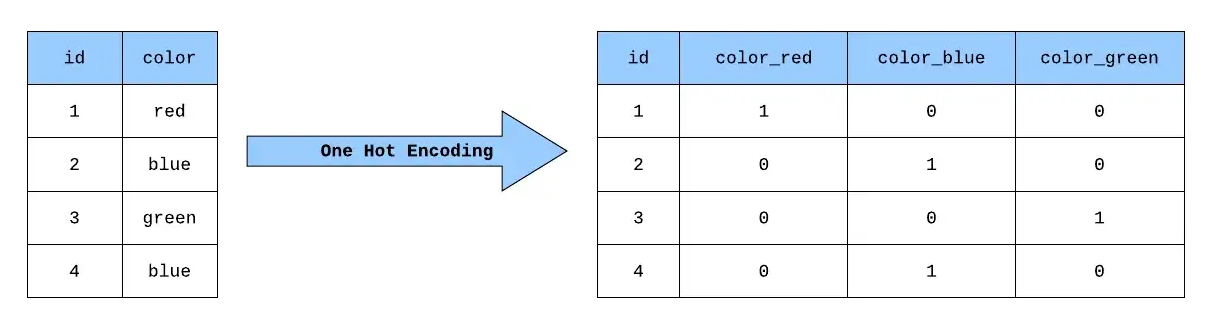

In [1416]:
from sklearn.preprocessing import OneHotEncoder

In [1417]:
cols = ["gender", "embarked", "title"]
enc = OneHotEncoder(handle_unknown="ignore") # 모르는 범주가 있을 경우 무시 ( 모두 0으로 처리함 )
enc.fit(train_ft[cols])

OneHotEncoder(handle_unknown='ignore')

In [1418]:
enc.transform(train_ft[cols]).toarray() # 인코딩된 데이터

array([[0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [1419]:
enc.get_feature_names_out() # 인코딩된 데이터 컬럼명

array(['gender_female', 'gender_male', 'embarked_C', 'embarked_Q',
       'embarked_S', 'title_Master', 'title_Miss', 'title_Mr',
       'title_Mrs', 'title_UNK'], dtype=object)

In [1420]:
# enc.fit_transform(train_ft[cols]).toarray() # 학습데이터는 가능, 테스트데이터에 대해서는 x

In [1421]:
tmp = pd.DataFrame(
    enc.transform(train_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
train_ft = pd.concat([train_ft, tmp], axis=1).drop(columns=cols)
train_ft.head()

,pclass,age,sibsp,parch,fare,has_family,gender_female,gender_male,embarked_C,embarked_Q,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_UNK
0,1,71.0,0,0,49.5042,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,34.0,0,0,8.0500,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,29.0,3,1,22.0250,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2,18.0,1,1,13.0000,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,48.0,0,0,26.5500,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [1422]:
tmp = pd.DataFrame(
    enc.transform(test_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
test_ft = pd.concat([test_ft, tmp], axis=1).drop(columns=cols)
test_ft.head()

,pclass,age,sibsp,parch,fare,has_family,gender_female,gender_male,embarked_C,embarked_Q,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_UNK
0,1,62.000000,0,0,26.5500,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,28.000000,0,0,47.1000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,24.000000,0,0,9.5000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3,22.503853,0,0,7.7333,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3,18.500000,0,0,7.2833,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Feature Scaling
- Min-Max Scaling
    - 데이터 수치의 범위를 바꿔주는 정규화 스케일링 기법입니다.
    - 데이터 수치의 범위를 0 ~ 1 사이로 바꿔준다.
$$
\frac{x-Min(X)}{Max(X)-Min(X)}
$$

In [1423]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1424]:
train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
train_ft.head()

,pclass,age,sibsp,parch,fare,has_family,gender_female,gender_male,embarked_C,embarked_Q,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_UNK
0,0.0,0.887260,0.000,0.000000,0.096626,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.423776,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.361142,0.375,0.111111,0.042990,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.5,0.223350,0.125,0.111111,0.025374,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.599148,0.000,0.000000,0.051822,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [1425]:
test_ft[test_ft.columns] = scaler.transform(test_ft)
test_ft.head()

,pclass,age,sibsp,parch,fare,has_family,gender_female,gender_male,embarked_C,embarked_Q,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_UNK
0,0.0,0.774521,0.0,0.0,0.051822,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.348616,0.0,0.0,0.091933,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.298509,0.0,0.0,0.018543,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.279768,0.0,0.0,0.015094,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.229613,0.0,0.0,0.014216,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [1426]:
target = train["survived"]
target

,survived
0,0
1,0
2,0
3,1
4,1
...,...
911,1
912,0
913,0
914,0


# 데이터 분리(Data Split)
- 학습데이터와 검증데이터 분리

In [1427]:
from sklearn.model_selection import train_test_split

# 학습용 입력데이터, 검증용 입력데이터, 학습용 정답데이터, 검증용 정답데이터
x_train, x_valid, y_train, y_valid = train_test_split(train_ft, target, test_size=0.2, random_state=42) # 검증데이터 비중, 시드 고정
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((732, 16), (184, 16), (732,), (184,))

# 모델 학습(Train Model)


In [1428]:
from sklearn.linear_model import LogisticRegression

In [1429]:
model = LogisticRegression(random_state=42)

In [1430]:
model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [1431]:
pred = model.predict(x_valid)
pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1])

In [1432]:
from sklearn.metrics import accuracy_score

accuracy_score(y_valid, pred)

0.8206521739130435

# 모델 평가(Model Evaluation)

In [1433]:
model.fit(train_ft, target) # 테스트 데이터에 대해서 평가하기 전에 전체 데이터에 대해서 다시 학습

LogisticRegression(random_state=42)

In [1434]:
pred = model.predict(test_ft)
pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,

In [1435]:
pd.DataFrame(pred, columns=["target"]).to_csv("권지혁_로지스틱모델.csv", index=False)

# 학습 완료된 모델 파일로 저장하기

In [1436]:
import joblib

In [1437]:
joblib.dump(model, "lr_model.pkl")

['lr_model.pkl']

In [1438]:
lr_model = joblib.load("lr_model.pkl")
lr_model.predict(test_ft)

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,